In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    

In [3]:
def adder(state: AgentState) -> AgentState:
    """ this func adds two numbers """
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subractor(state: AgentState) -> AgentState:
    """ this func subtracts two numbers """
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [4]:
graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "adder",
        "subtraction_operation": "subtractor",
    },
)
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)
app = graph.compile()

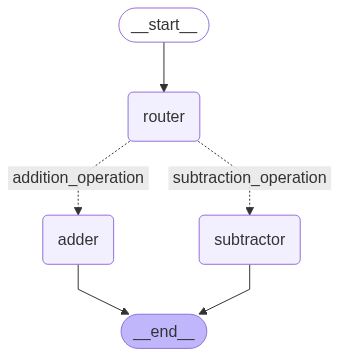

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke({"number1": 1, "number2": 2, "operation": "-"})

{'number1': 1, 'operation': '-', 'number2': 2, 'finalNumber': -1}

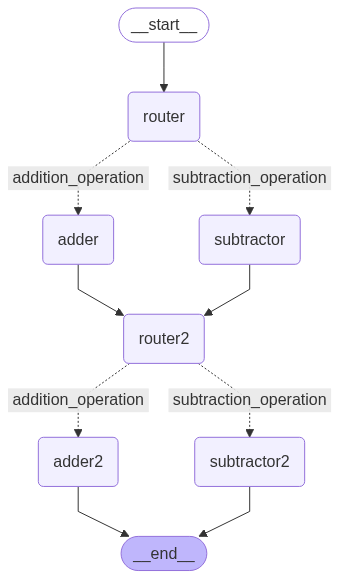

In [9]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int


def adder(state: AgentState) -> AgentState:
    """ this function adds number1 and number2 """
    state["finalNumber"] = state["number1"] + state["number2"]
    return state
    
def subtractor(state: AgentState) -> AgentState:
    """ this function subtracts number1 and number2 """
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decision_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"


graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state)
graph.add_node("adder2", adder)
graph.add_node("subtractor2", subtractor)
graph.add_node("router2", lambda state: state)


graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_operation": "adder",
        "subtraction_operation": "subtractor"
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")

graph.add_conditional_edges(
    "router2",
    decision_node,
    {
        "addition_operation": "adder2",
        "subtraction_operation": "subtractor2"
    }
)
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)


app = graph.compile()

from IPython.display import Image, display
Image(app.get_graph().draw_mermaid_png())

In [11]:
app.invoke({
    "number1": 10,
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "operation": "-",
    "operation2": "+"
})

{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation': '-',
 'operation2': '+',
 'finalNumber': 5}

In [12]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

def adder(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def adder2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decision_node(state: AgentState) -> str:
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

def decision_node2(state: AgentState) -> str:
    if state["operation2"] == "+":
        return "addition_operation"
    elif state["operation2"] == "-":
        return "subtraction_operation"

graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state)
graph.add_node("adder2", adder2)
graph.add_node("subtractor2", subtractor2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_operation": "adder",
        "subtraction_operation": "subtractor"
    }
)
graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")
graph.add_conditional_edges(
    "router2",
    decision_node2,
    {
        "addition_operation": "adder2",
        "subtraction_operation": "subtractor2"
    }
)
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)

app = graph.compile()

output = app.invoke({
    "number1": 10,
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "operation": "-",
    "operation2": "+"
})

output


{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation': '-',
 'operation2': '+',
 'finalNumber': 5,
 'finalNumber2': 9}